In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from collections import Counter

import json
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Specify the URL of the Gap Bestsellers Men's website
url = "https://www.gap.com/browse/category.do?cid=3024420&nav=meganav%3AMen%3AJust%20Arrived%3ABestsellers"

driver = webdriver.Chrome()
driver.get(url)

# Wait for the page to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "product-card")))

# Scroll down to load all products (you may need to adjust the number of scrolls)
for _ in range(5):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    WebDriverWait(driver, 5).until(EC.invisibility_of_element_located((By.CLASS_NAME, "loading-spinner")))

# Get the page source after scrolling
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Find all divs with the specified class
product_divs = soup.find_all('div', class_='cat_product-image category-page-mvez9e')

# Initialize lists to store extracted data
product_links = []
product_names = []

# Iterate through product divs
for product_div in product_divs:
    # Find the anchor tag inside the div
    anchor_tag = product_div.find('a')
    
    # Extract link
    product_link = anchor_tag['href']
    product_links.append(product_link)
    
    # Extract product name
    product_name = anchor_tag.img['alt']
    product_names.append(product_name)

# Create a dictionary with the data
data = {
    'Product Name': product_names,
    'Product Link': product_links
}

# Create a DataFrame from the dictionary
product_catalogue = pd.DataFrame(data)

# Initialize an empty DataFrame to store the review data
df = pd.DataFrame(columns=["product_url", "product_name", "review_heading", "review_description", "rating"])

# Loop through each product URL
for product in product_links:
    driver.get(product)
    index = product_links.index(product)

    # Scroll down to load reviews (you may need to adjust the scroll and sleep times)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(15)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)

    # Get the page source after scrolling
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Find review headings, descriptions, and ratings
    review_headings = []
    review_headers = soup.find_all('h2', attrs={'class': 'pr-rd-review-headline'})
    for header in review_headers:
        text = header.get_text()
        review_headings.append(text)

    review_descriptions = []
    review_desc = soup.find_all('p', attrs={'class': "pr-rd-description-text", 'lang' : "en"})
    for desc in review_desc:
        text = desc.get_text()
        review_descriptions.append(text)

    ratings = []
    stars = soup.find_all('div', attrs={'class': 'pr-rd-star-rating'})
    for star in stars:
        text = star.get_text()
        ratings.append(text)

    # Create a DataFrame for the current product's reviews
    product_df = pd.DataFrame({
        "product_name": [product_names[index]] * len(review_headings),
        "review_heading": review_headings,
        "review_description": review_descriptions,
        "rating": ratings,
        "product_url": [product] * len(review_headings)
    })

    # Append the product's reviews to the main DataFrame
    df = pd.concat([df, product_df], ignore_index=True)

# Close the web driver
driver.close()
driver.quit()

In [ ]:
df.to_csv('GAP_Bestsellers_Men_Reviews.csv', index=False)

In [ ]:

# Specify the URL of the Gap Bestsellers Men's website
url = "https://www.gap.com/browse/category.do?cid=3024420&nav=meganav%3AMen%3AJust%20Arrived%3ABestsellers"

driver = webdriver.Chrome()
driver.get(url)

# Wait for the page to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "product-card")))

# Scroll down to load all products (you may need to adjust the number of scrolls)
for _ in range(5):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    WebDriverWait(driver, 5).until(EC.invisibility_of_element_located((By.CLASS_NAME, "loading-spinner")))

# Get the page source after scrolling
page_source = driver.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, 'html.parser')

# Find all divs with the specified class
product_divs = soup.find_all('div', class_='cat_product-image category-page-mvez9e')

# Initialize lists to store extracted data
product_links = []
product_names = []

# Iterate through product divs
for product_div in product_divs:
    # Find the anchor tag inside the div
    anchor_tag = product_div.find('a')
    
    # Extract link
    product_link = anchor_tag['href']
    product_links.append(product_link)
    
    # Extract product name
    product_name = anchor_tag.img['alt']
    product_names.append(product_name)

# Create a dictionary with the data
data = {
    'Product Name': product_names,
    'Product Link': product_links
}

# Create a DataFrame from the dictionary
product_catalogue = pd.DataFrame(data)

# Initialize an empty DataFrame to store the review data
df = pd.DataFrame(columns=["product_url", "product_name", "review_heading", "review_description", "rating"])

# Loop through each product URL
for product in product_links:
    driver.get(product)
    index = product_links.index(product)

    # Scroll down to load reviews (you may need to adjust the scroll and sleep times)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(15)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)

    # Get the page source after scrolling
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Find review headings, descriptions, and ratings
    review_headings = []
    review_headers = soup.find_all('h2', attrs={'class': 'pr-rd-review-headline'})
    for header in review_headers:
        text = header.get_text()
        review_headings.append(text)

    review_descriptions = []
    review_desc = soup.find_all('p', attrs={'class': "pr-rd-description-text", 'lang' : "en"})
    for desc in review_desc:
        text = desc.get_text()
        review_descriptions.append(text)

    ratings = []
    stars = soup.find_all('div', attrs={'class': 'pr-rd-star-rating'})
    for star in stars:
        text = star.get_text()
        ratings.append(text)

    # Create a DataFrame for the current product's reviews
    product_df = pd.DataFrame({
        "product_name": [product_names[index]] * len(review_headings),
        "review_heading": review_headings,
        "review_description": review_descriptions,
        "rating": ratings,
        "product_url": [product] * len(review_headings)
    })

    # Append the product's reviews to the main DataFrame
    df = pd.concat([df, product_df], ignore_index=True)

# Close the web driver
driver.close()
driver.quit()

In [ ]:
df.to_csv('GAP_Bestsellers_Women_Reviews.csv', index=False)

##### We have succesfully scraped the review dats from the Bestseller's on the GAP website for Men & Women

In [2]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from collections import Counter
import json
import pandas as pd
import numpy as np
import time
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download("averaged_perceptron_tagger")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
gap_women = pd.read_csv("GAP_Bestsellers_Women_Reviews.csv")
gap_men = pd.read_csv("GAP_Bestsellers_Men_Reviews.csv")
combined_df = pd.concat([gap_women, gap_men], ignore_index=True)

# Remove the 'product_url' and 'product_name' columns
combined_df.drop(['product_url', 'product_name'], axis=1, inplace=True)

# Concatenate 'review_heading' and 'review_description' into a new column 'combined'
combined_df['combined'] = combined_df['review_heading'] + ' ' + combined_df['review_description']

# Drop the original 'review_heading' and 'review_description' columns
combined_df.drop(['review_heading', 'review_description'], axis=1, inplace=True)

In [4]:
# Priyanka's Azure credemtials
key = 'ab9393a8b85842ae91003bdd8ce1b28f'
endpoint = 'https://workspace.cognitiveservices.azure.com/'

def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint,
        credential=ta_credential)
    return text_analytics_client

def analyze_sentiments(descriptions):
    client = authenticate_client()
    sentiments = []

    requests_per_second_limit = 100
    requests_per_minute_limit = 300
    txt_number = 0
    time_counter = time.time()

    for txt in descriptions:
        txt_number += 1
        #print(f"Processing description {txt_number}...")

        # Detect Sentiments
        response = client.analyze_sentiment(documents=[txt])[0]
        if not response.is_error:
            sentiments.append(response.sentiment)
        else:
            print(f"Error processing description {txt_number}: {response.id}, {response.error}")

        end_time = time.time()

        requests_in_this_second = txt_number % requests_per_second_limit
        requests_in_this_minute = txt_number % requests_per_minute_limit

        # If we reach the limit of requests per second, add a delay to maintain the limit
        if requests_in_this_second == 0:
            time_taken_for_batch = end_time - time_counter
            if time_taken_for_batch < 1:
                time.sleep(1 - time_taken_for_batch)
            time_counter = time.time()

        if requests_in_this_minute == 0:
            time_taken_for_minute = end_time - time_counter
            if time_taken_for_minute < 60:
                time.sleep(60 - time_taken_for_minute)
            time_counter = time.time()

    return sentiments

def read_scores(sent_file):
    with open(sent_file) as f:
        return {line.split('\t')[0]: int(line.split('\t')[1]) for line in f}

### Sentiment Analysis of GAP Reviews

In [5]:
Scores_Table = read_scores('Files_Directory/Twitter/AFINN-111.txt')

scores_new_posts = []
combined_data = combined_df['combined'].to_list()

for txt in combined_data:
    count = 0;
    for score in Scores_Table:
         string = json.dumps(txt).lower()
         word_score = string.count(score) * Scores_Table[score]
         count = count + word_score
    scores_new_posts.append(count)
    
sentiments = analyze_sentiments(combined_data)

value_counts_only = Counter(sentiments)

print('The Sentiment Analysis of Review from GAP Website')
# Iterate through the Counter object and print in the desired format
for value, count in value_counts_only.items():
    print(f"{value} : {count}")

The Sentiment Analysis of Review from GAP Website
mixed : 105
positive : 482
negative : 58
neutral : 14


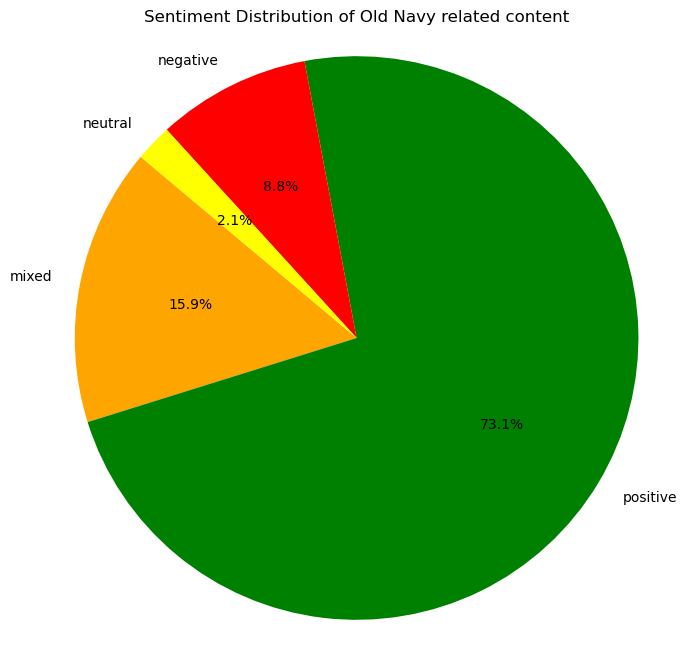

In [6]:
# Define colors for each sentiment
colors = ['orange', 'green', 'red', 'yellow']

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(value_counts_only.values(), labels=value_counts_only.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution of Old Navy related content')  # Set the title

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Analyzing Poor Review which have a rating of 1 start or 2 stars

In [7]:
negative_reviews = combined_df[combined_df['rating'] < 3]

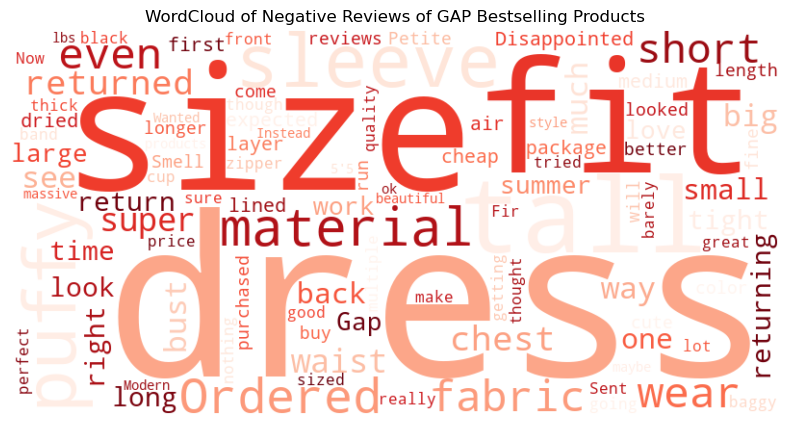

In [8]:
text_combined_negative = ''

# Combine all the text into a single string
text_combined_negative = ' '.join(negative_reviews['combined'])

# Initialize the WordCloud object with a red colormap
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='Reds', collocations=False).generate(text_combined_negative)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Reviews of GAP Bestselling Products')
plt.show()

In [9]:
#approach from link = 'https://towardsdatascience.com/using-nlp-to-figure-out-what-people-really-think-e1d10d98e491'

import re
import string
import nltk
from nltk.corpus import stopwords

# Initialize NLTK stopwords
sw = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)

    # Tokenize the data
    text = nltk.word_tokenize(text)
    
    # Remove stopwords
    text = [w for w in text if w not in sw]
    
    # Concatenate the cleaned words back into a single string
    cleaned_text = ' '.join(text)
    
    return cleaned_text


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Determine the part of speech (POS) for each word
    pos_tags = nltk.pos_tag(words)
    
    # Map POS tags to WordNet POS tags for lemmatization
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  # Default to noun
    
    # Lemmatize each word based on its POS
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text


# Define a function to preprocess and tokenize text
def preprocess_and_tokenize(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return words

In [10]:
negative_reviews['cleaned_reviews'] = negative_reviews['combined'].apply(lambda x: clean_text(x))

negative_reviews['lemmatized_reviews'] = negative_reviews['cleaned_reviews'].apply(lambda x: lemmatize_text(x))

# Apply the preprocessing and tokenization function to the 'reviews' column
negative_reviews['reviews_tokenized'] = negative_reviews['cleaned_reviews'].apply(preprocess_and_tokenize)

# Access the list of tokenized words for each review
list_of_lists_of_words = negative_reviews['reviews_tokenized'].tolist()

# Flatten the list of lists into a single list of words
list_of_words = [word for words in list_of_lists_of_words for word in words] 

C:\Users\HP1\AppData\Local\Temp\ipykernel_14824\2478524958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['cleaned_reviews'] = negative_reviews['combined'].apply(lambda x: clean_text(x))
C:\Users\HP1\AppData\Local\Temp\ipykernel_14824\2478524958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['lemmatized_reviews'] = negative_reviews['cleaned_reviews'].apply(lambda x: lemmatize_text(x))
C:\Users\HP1\AppData\Local\Temp\ipykernel_14824\2478524958.py:6: SettingWithCopy

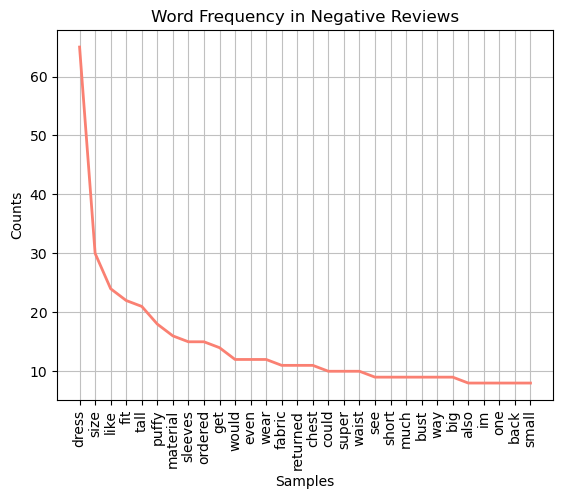

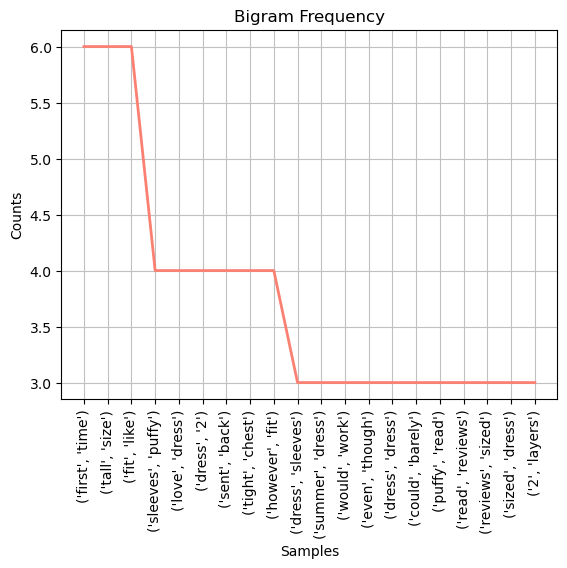

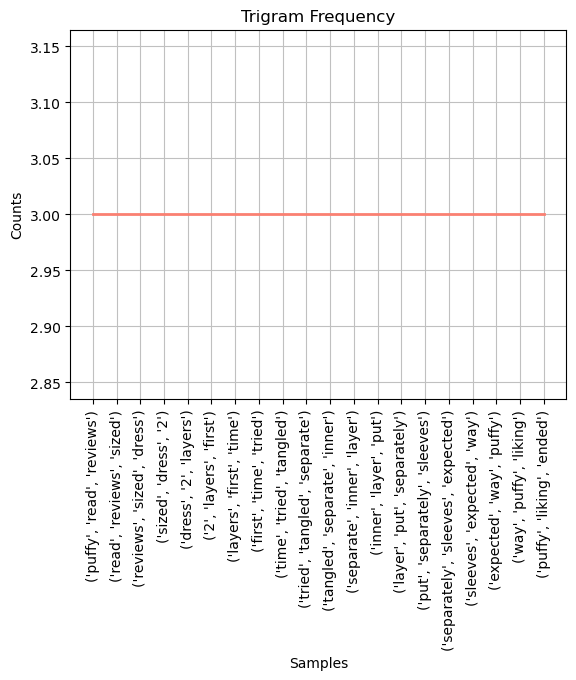

<Axes: title={'center': 'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [11]:
#Get word frequency    
nlp_words = nltk.FreqDist(list_of_words)
plot1 = nlp_words.plot(30, color='salmon', title='Word Frequency in Negative Reviews')

#Bigrams
bigrm = list(nltk.bigrams(list_of_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

#Trigrams
bigrm = list(nltk.trigrams(list_of_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency')

### Analyzing Good Review which have a rating of > 3 stars

In [12]:
positive_reviews = combined_df[combined_df['rating'] >= 3]
positive_text = positive_reviews['combined'].to_list()
positive_text

["It's the cutest thing in the world. It's the cutest thing in the world.\n\nI would definitely recommend the stress. It's so cute and I get all kinds of compliments on it. The only thing is that it shrinks in the dryer real bad so I had to send it back and get an exchange after washing it once. But now that I know I just hang the new one dry and it does perfectly with just a fluff at the end.",
 "Versatile dress Love the fit. It's a great dress. You could dress it up or have it for a casual event.",
 'Fit is true to size Fit is true to size. Waistline is a bit high. Good sleeve length.',
 'Brown color - amazing dress Runs small especially in the arm areas, Eyelet dress that can be dressed up or down',
 "Adorable  & great fit Love this dress  Fits well Wore for the first time & it's so comfortable & really cute",
 'Lovely Very cut dress, fits nicely, runs true de size',
 'Super cute dress Chic little navy dress. Lovely eye lit details on neck and hemline.\nThe fabric quality is very cr

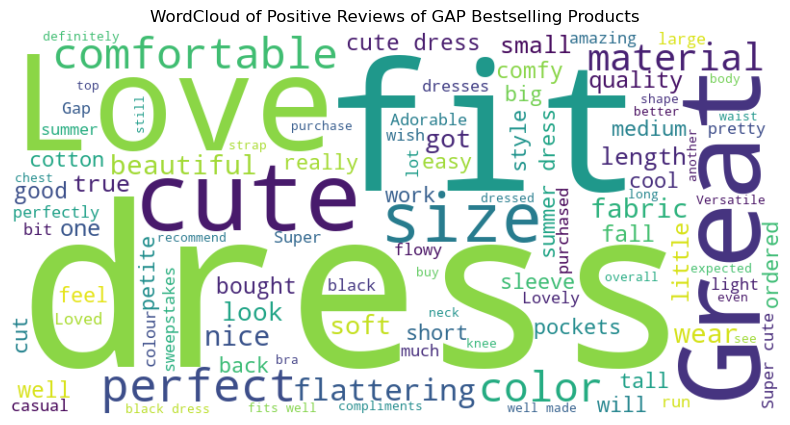

In [13]:
text_combined_positive = ''

# Combine all the text into a single string
text_combined_positive = ' '.join(positive_reviews['combined'])

# Initialize the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text_combined_positive)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Reviews of GAP Bestselling Products')
plt.show()

In [14]:
positive_reviews['cleaned_reviews'] = positive_reviews['combined'].apply(lambda x: clean_text(x)) 
positive_reviews['lemmatized_reviews'] = positive_reviews['cleaned_reviews'].apply(lambda x: lemmatize_text(x))
# Apply the preprocessing and tokenization function to the 'reviews' column
positive_reviews['reviews_tokenized'] = positive_reviews['cleaned_reviews'].apply(preprocess_and_tokenize)
# Access the list of tokenized words for each review
list_of_lists_of_words = positive_reviews['reviews_tokenized'].tolist()
# Flatten the list of lists into a single list of words
list_of_words = [word for words in list_of_lists_of_words for word in words]

C:\Users\HP1\AppData\Local\Temp\ipykernel_14824\518258938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['cleaned_reviews'] = positive_reviews['combined'].apply(lambda x: clean_text(x))
C:\Users\HP1\AppData\Local\Temp\ipykernel_14824\518258938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['lemmatized_reviews'] = positive_reviews['cleaned_reviews'].apply(lambda x: lemmatize_text(x))
C:\Users\HP1\AppData\Local\Temp\ipykernel_14824\518258938.py:4: SettingWithCopyWar

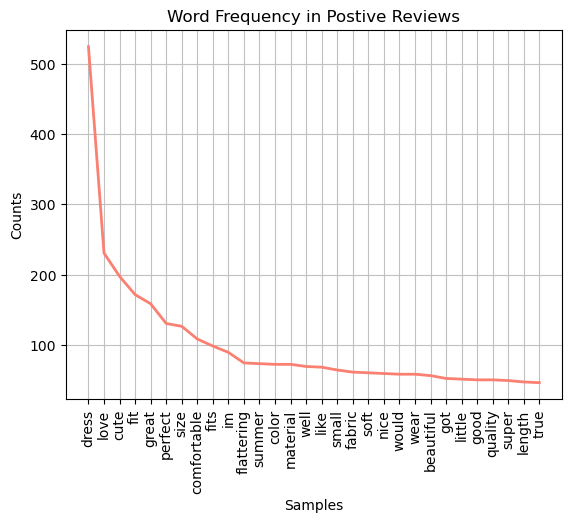

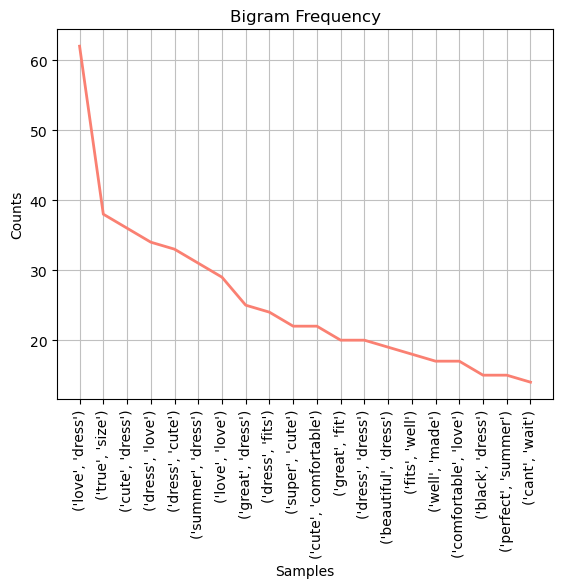

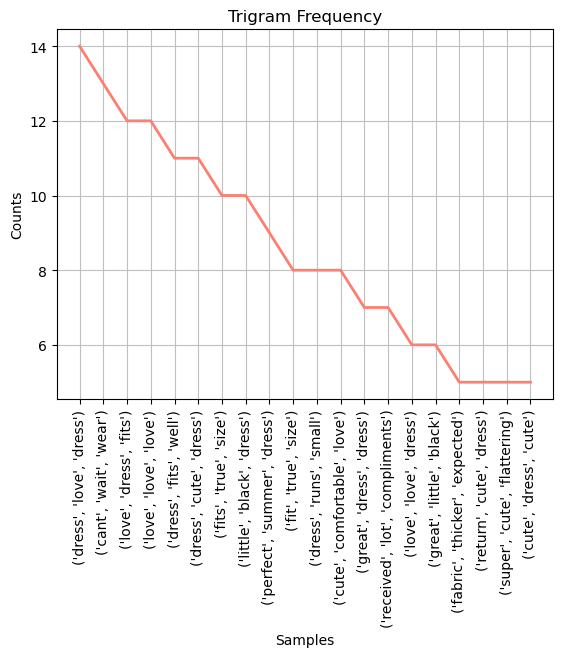

<Axes: title={'center': 'Trigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [15]:
#Get word frequency    
nlp_words = nltk.FreqDist(list_of_words)
plot1 = nlp_words.plot(30, color='salmon', title='Word Frequency in Postive Reviews')

#Bigrams
bigrm = list(nltk.bigrams(list_of_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

#Trigrams
bigrm = list(nltk.trigrams(list_of_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency')